In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. terror 데이터 불러오기

In [2]:
terror = pd.read_csv('terror.csv',encoding="ISO-8859-1")
terror.head()

C:\Users\samsung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## 3. 기본 시각화 (1)
### Q. 테러는 어느 달에 가장 많이 일어날까?

In [3]:
# 테러가 일어난 '月' 파악 후 시각화
terror['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

In [4]:
terror = terror[terror['imonth']!=0]

In [5]:
monthlyterror = dict(terror['imonth'].value_counts())
x = list(monthlyterror.keys())
y = list(monthlyterror.values())

df = pd.DataFrame({'month':x,'terrors':y})

In [6]:
df

,month,terrors
0,5,16875
1,7,16268
2,8,15800
3,10,15563
4,6,15359
5,3,15257
6,4,15152
7,1,14936
8,11,14906
9,9,14180


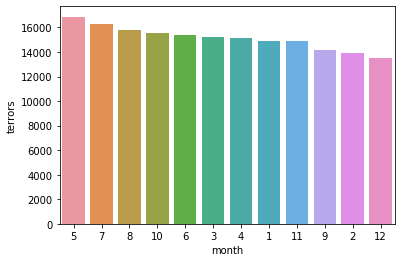

In [8]:
sns.barplot(df['month'],df['terrors'], order=df['month'])

### Q. 테러횟수가 4000번 이상인 국가는?

In [ ]:
over_4000 = terror[terror['country_txt'].value_counts()>4000]

In [121]:
tercountry = terror['country_txt'].value_counts()
tercountry

Iraq                              24636
Pakistan                          14367
Afghanistan                       12731
India                             11960
Colombia                           8304
Philippines                        6906
Peru                               6096
El Salvador                        5319
United Kingdom                     5235
Turkey                             4290
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3021
United States                      2836
Algeria                            2743
France                             2690
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [122]:
tercountry4000 = tercountry[tercountry>4000]
tercountry4000

Iraq              24636
Pakistan          14367
Afghanistan       12731
India             11960
Colombia           8304
Philippines        6906
Peru               6096
El Salvador        5319
United Kingdom     5235
Turkey             4290
Somalia            4142
Name: country_txt, dtype: int64

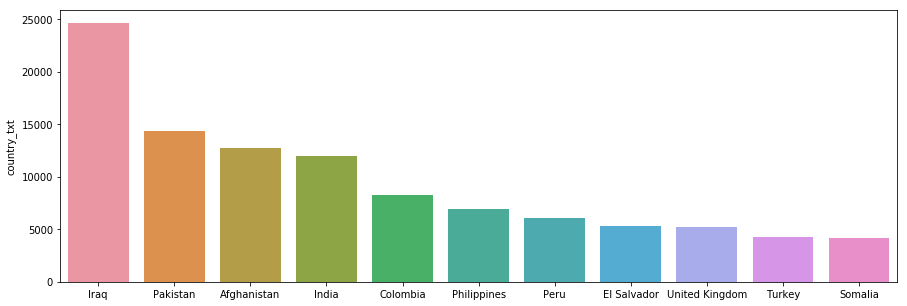

In [130]:
plt.figure(figsize=(15,5))
sns.barplot(tercountry4000.index, tercountry4000)

### Q. 이라크에서 일어난 테러 유형들의 건 수/사살력은?

In [51]:
# nkill : 죽은 사람 수

In [131]:
iraqterror = terror[terror['country_txt']=='Iraq']

In [132]:
iraqterror['attacktype1_txt'].value_counts()

Bombing/Explosion                      18286
Armed Assault                           3155
Assassination                           1287
Hostage Taking (Kidnapping)              946
Unknown                                  765
Facility/Infrastructure Attack           154
Hostage Taking (Barricade Incident)       24
Hijacking                                 13
Unarmed Assault                            6
Name: attacktype1_txt, dtype: int64

In [133]:
terrortype = dict(iraqterror['attacktype1_txt'].value_counts())
x = list(terrortype.keys())
y = list(terrortype.values())

df2 = pd.DataFrame({'type':x,'killed':y})

In [134]:
df2

,type,killed
0,Bombing/Explosion,18286
1,Armed Assault,3155
2,Assassination,1287
3,Hostage Taking (Kidnapping),946
4,Unknown,765
5,Facility/Infrastructure Attack,154
6,Hostage Taking (Barricade Incident),24
7,Hijacking,13
8,Unarmed Assault,6


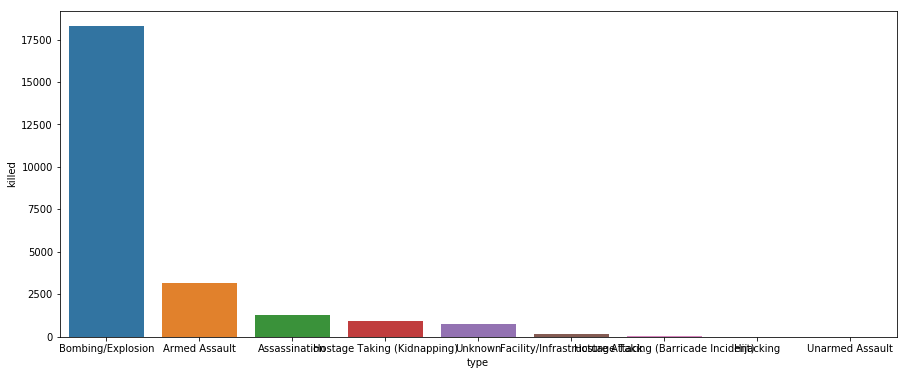

In [136]:
plt.figure(figsize=(15,6))
sns.barplot(df2['type'],df2['killed'], order=df2['type'])

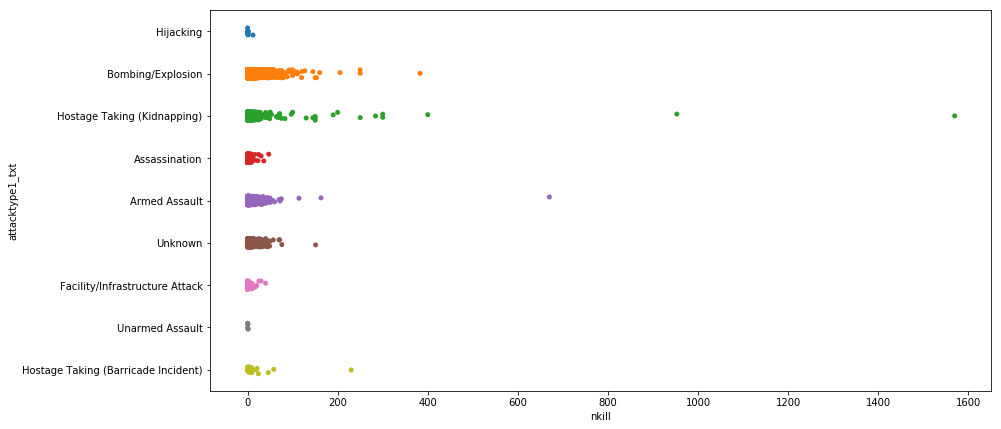

In [137]:
plt.figure(figsize=(14,7))
sns.stripplot(iraqterror['nkill'],iraqterror['attacktype1_txt'], jitter=0.1)

### 3. "년"&"월"에 따른 이라크 건 수는?

In [138]:
iraqterror_1 = pd.pivot_table(iraqterror, index=['imonth'], columns=['iyear'],values=['nkill'], aggfunc='count')
iraqterror_1

nkill                                               ...           \
iyear   1975 1976 1979 1980 1981 1982 1983 1984 1987 1988  ...     2008   
imonth                                                     ...            
1        NaN  NaN  NaN  1.0  0.0  0.0  NaN  NaN  NaN  NaN  ...     97.0   
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...     32.0   
3        1.0  NaN  NaN  1.0  NaN  0.0  2.0  1.0  NaN  NaN  ...     92.0   
4        NaN  NaN  NaN  1.0  NaN  NaN  0.0  NaN  NaN  NaN  ...    171.0   
5        NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...    111.0   
6        NaN  NaN  1.0  1.0  0.0  0.0  NaN  1.0  1.0  NaN  ...    126.0   
7        NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...    111.0   
8        NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  2.0  ...     87.0   
9        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...     39.0   
10       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...     65.0   
11       NaN  NaN  0.0  1.0  NaN  NaN  NaN  NaN  NaN  1.0  ...     86.0   
12       NaN  3.0  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  ...     80.0   

                                                                       
iyear    2009   2010   2011   2012   2013   2014   2015   2016   2017  
imonth                                                                 
1        97.0   43.0   92.0  192.0  109.0  363.0  246.0  285.0  170.0  
2        73.0  126.0   61.0  120.0  102.0  420.0  189.0  299.0  246.0  
3        85.0   77.0  106.0  100.0  130.0  491.0  199.0  269.0  207.0  
4        95.0   84.0  115.0  131.0  145.0  359.0  214.0  234.0  190.0  
5        84.0   70.0  118.0  104.0  231.0  423.0  205.0  328.0  250.0  
6        75.0   82.0  118.0  111.0  193.0  310.0  218.0  305.0  270.0  
7        95.0  118.0   85.0  126.0  277.0  259.0  208.0  258.0  204.0  
8        85.0  135.0   79.0  136.0  287.0  220.0  215.0  244.0  199.0  
9        90.0  113.0   90.0  145.0  236.0  246.0  199.0  302.0  173.0  
10      116.0  109.0   97.0   91.0  294.0  218.0  245.0  233.0  138.0  
11      103.0  120.0  197.0   77.0  384.0  228.0  256.0  218.0  156.0  
12      136.0  102.0  146.0   89.0  424.0  231.0  241.0  226.0  130.0  

[12 rows x 37 columns]

In [139]:
len(iraqterror_1['nkill'])

12

In [140]:
iraqterror_1['nkill'].isna().sum()

iyear
1975    11
1976    11
1979    10
1980     6
1981     9
1982     7
1983    10
1984    10
1987     9
1988     9
1989     8
1991    10
1992     4
1994     4
1995     1
1996     5
1997     1
1998     8
1999     6
2000     8
2001     9
2002     8
2003     2
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
dtype: int64

In [141]:
iraqterror_2 = iraqterror_1.dropna(axis=1)
iraqterror_2

nkill                                                                 \
iyear   2004   2005   2006   2007   2008   2009   2010   2011   2012   2013   
imonth                                                                        
1       20.0   65.0   59.0   52.0   97.0   97.0   43.0   92.0  192.0  109.0   
2       15.0   21.0  190.0   58.0   32.0   73.0  126.0   61.0  120.0  102.0   
3        7.0   80.0   48.0   99.0   92.0   85.0   77.0  106.0  100.0  130.0   
4       21.0   71.0  110.0   48.0  171.0   95.0   84.0  115.0  131.0  145.0   
5       20.0   81.0   42.0   38.0  111.0   84.0   70.0  118.0  104.0  231.0   
6       37.0   15.0   17.0  223.0  126.0   75.0   82.0  118.0  111.0  193.0   
7       34.0  106.0   82.0   62.0  111.0   95.0  118.0   85.0  126.0  277.0   
8       21.0   76.0   50.0   28.0   87.0   85.0  135.0   79.0  136.0  287.0   
9       30.0   31.0   40.0   29.0   39.0   90.0  113.0   90.0  145.0  236.0   
10      51.0   28.0   63.0  198.0   65.0  116.0  109.0   97.0   91.0  294.0   
11      37.0   18.0   43.0  154.0   86.0  103.0  120.0  197.0   77.0  384.0   
12      22.0   16.0   61.0   53.0   80.0  136.0  102.0  146.0   89.0  424.0   

                                    
iyear    2014   2015   2016   2017  
imonth                              
1       363.0  246.0  285.0  170.0  
2       420.0  189.0  299.0  246.0  
3       491.0  199.0  269.0  207.0  
4       359.0  214.0  234.0  190.0  
5       423.0  205.0  328.0  250.0  
6       310.0  218.0  305.0  270.0  
7       259.0  208.0  258.0  204.0  
8       220.0  215.0  244.0  199.0  
9       246.0  199.0  302.0  173.0  
10      218.0  245.0  233.0  138.0  
11      228.0  256.0  218.0  156.0  
12      231.0  241.0  226.0  130.0

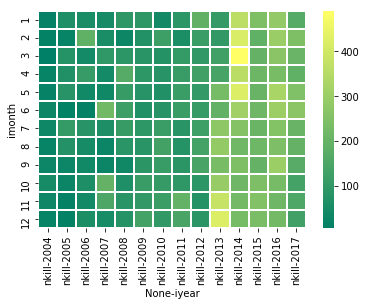

In [144]:
sns.heatmap(iraqterror_2,cmap='summer',linewidths=1.0)

### 테러 1건당 평균 희생자 수는? ( 연도 별로 어떻게 변하는지 확인하기 )

In [145]:
ncase = terror.groupby('iyear').size()
ncase

iyear
1970      650
1971      471
1972      567
1973      472
1974      579
1975      739
1976      921
1977     1314
1978     1524
1979     2659
1980     2662
1981     2586
1982     2543
1983     2870
1984     3495
1985     2915
1986     2859
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
dtype: int64

In [146]:
killed = terror.groupby('iyear')['nkill'].sum()
killed

iyear
1970      174.0
1971      173.0
1972      566.0
1973      370.0
1974      539.0
1975      617.0
1976      674.0
1977      456.0
1978     1459.0
1979     2097.0
1980     4400.0
1981     4851.0
1982     5136.0
1983     9444.0
1984    10450.0
1985     7094.0
1986     4976.0
1987     6482.0
1988     7208.0
1989     8152.0
1990     7148.0
1991     8429.0
1992     9742.0
1994     7690.0
1995     6103.0
1996     6966.0
1997    10924.0
1998     4688.0
1999     3393.0
2000     4403.0
2001     7729.0
2002     4805.0
2003     3317.0
2004     5743.0
2005     6331.0
2006     9380.0
2007    12824.0
2008     9157.0
2009     9273.0
2010     7827.0
2011     8246.0
2012    15497.0
2013    22273.0
2014    44490.0
2015    38853.0
2016    34871.0
2017    26445.0
Name: nkill, dtype: float64

In [147]:
yearly = pd.concat([ncase,killed],axis=1)
yearly.columns = ['ncase','nkill']
yearly

,ncase,nkill
iyear,,
1970,650,174.0
1971,471,173.0
1972,567,566.0
1973,472,370.0
1974,579,539.0
1975,739,617.0
1976,921,674.0
1977,1314,456.0
1978,1524,1459.0


In [148]:
yearly = yearly.assign(per=yearly['nkill']/yearly['ncase'])

In [149]:
yearly.head()

,ncase,nkill,per
iyear,,,
1970,650,174.0,0.267692
1971,471,173.0,0.367304
1972,567,566.0,0.998236
1973,472,370.0,0.783898
1974,579,539.0,0.930915


C:\Users\samsung\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\samsung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


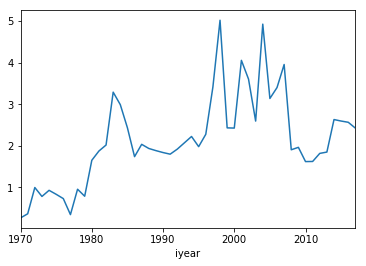

In [150]:
sns.tsplot(yearly['per'], time=yearly.index)

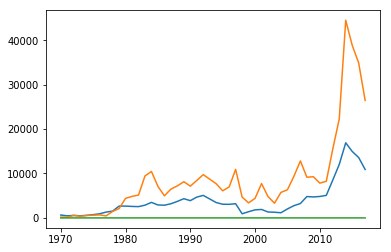

In [151]:
plt.plot(yearly)

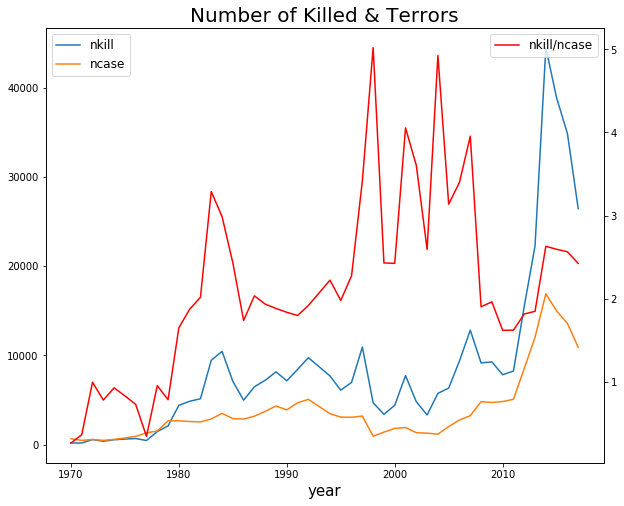

In [153]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(yearly['nkill'],label='nkill')
ax1.plot(yearly['ncase'],label='ncase')
ax1.legend(loc='best',fontsize='large')
plt.title('Number of Killed & Terrors', fontsize=20)
plt.xlabel('year', fontsize=15)

ax2 = ax1.twinx() 
ax2.plot(yearly['per'],label='nkill/ncase',color='red')
ax2.legend(loc='best', fontsize='large')